# Tutorial : Computing with triangular shapes of landmarks in Kendall shape spaces

In this tutorial, we show how to use geomstats to visualize data described by 3 landmarks within Kendall framework. This notebook is constructed as follows :
- First, we illustrate some geometric tools in pre-shape space of 3-ads in 2D
- Then, we show the same illustrations but for data in 3D
- Finally, we explore this visualization with the dataset of the optical nerves head

# Set up 

In [13]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import PreShapeSpace
from geomstats.visualization import KendallSphere

# The space $\Sigma_2^3$ of 2D triangles is a sphere

In [15]:
S = KendallSphere()

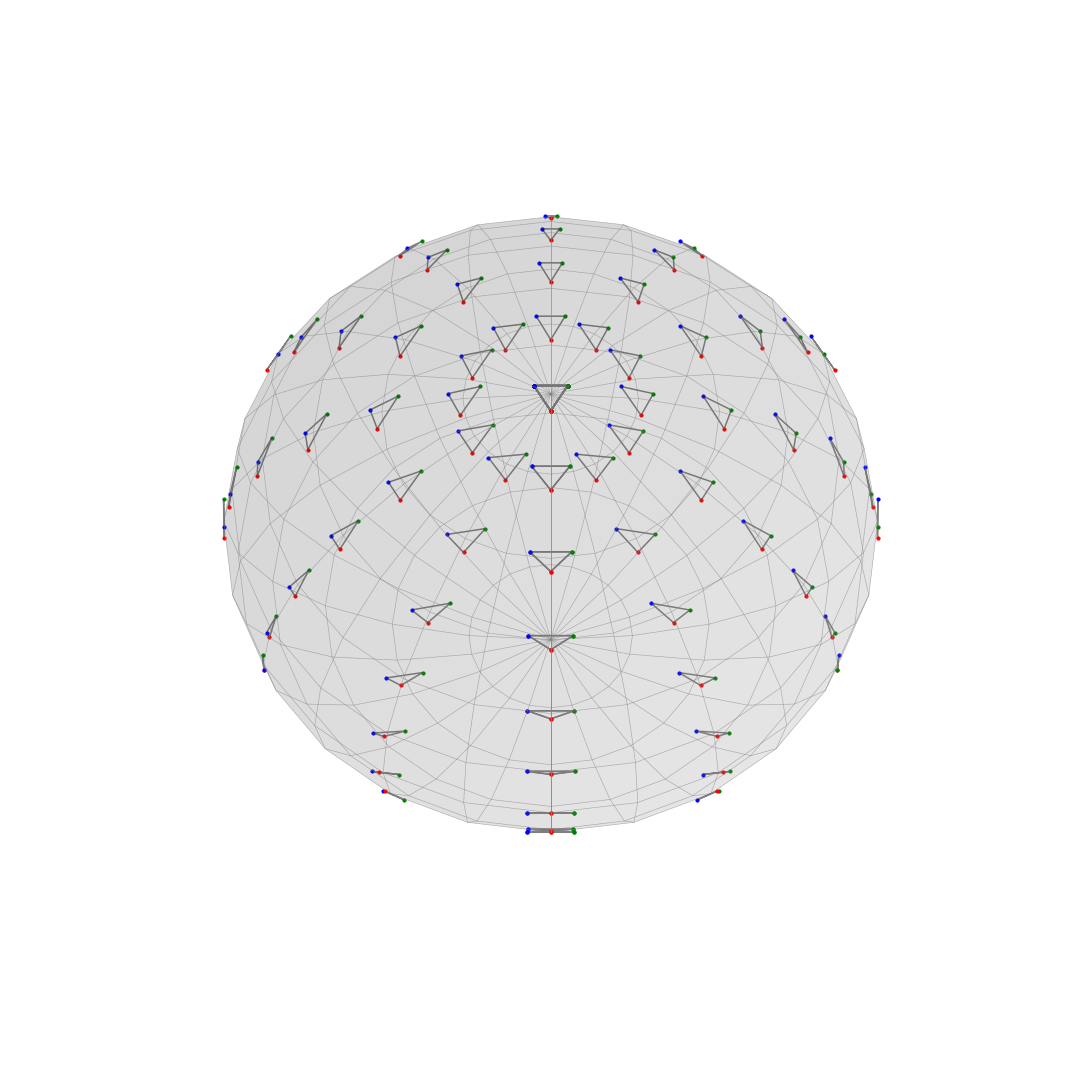

In [16]:
fig = plt.figure(figsize=(15,15))
S.set_ax()
S.set_view(60., 0.)
S.draw()

## Uniform distribution 

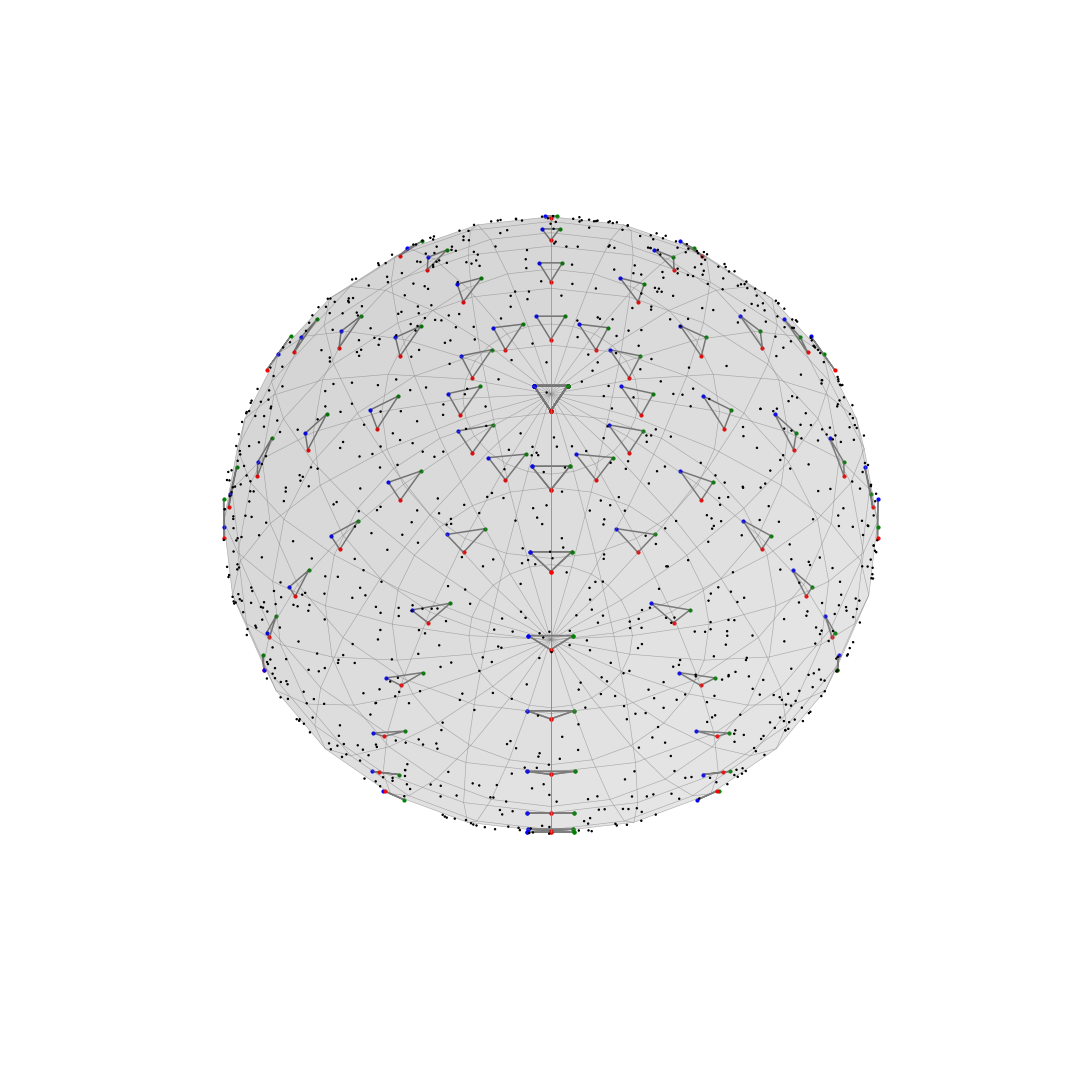

In [17]:
fig = plt.figure(figsize=(15,15))
S.set_ax()
S.set_view(60., 0.)
S.draw()

points = PreShapeSpace(3, 2).random_uniform(1000)

S.clear_points()
S.add_points(points)
S.draw_points(color='k', s=2)

## Geodesic 

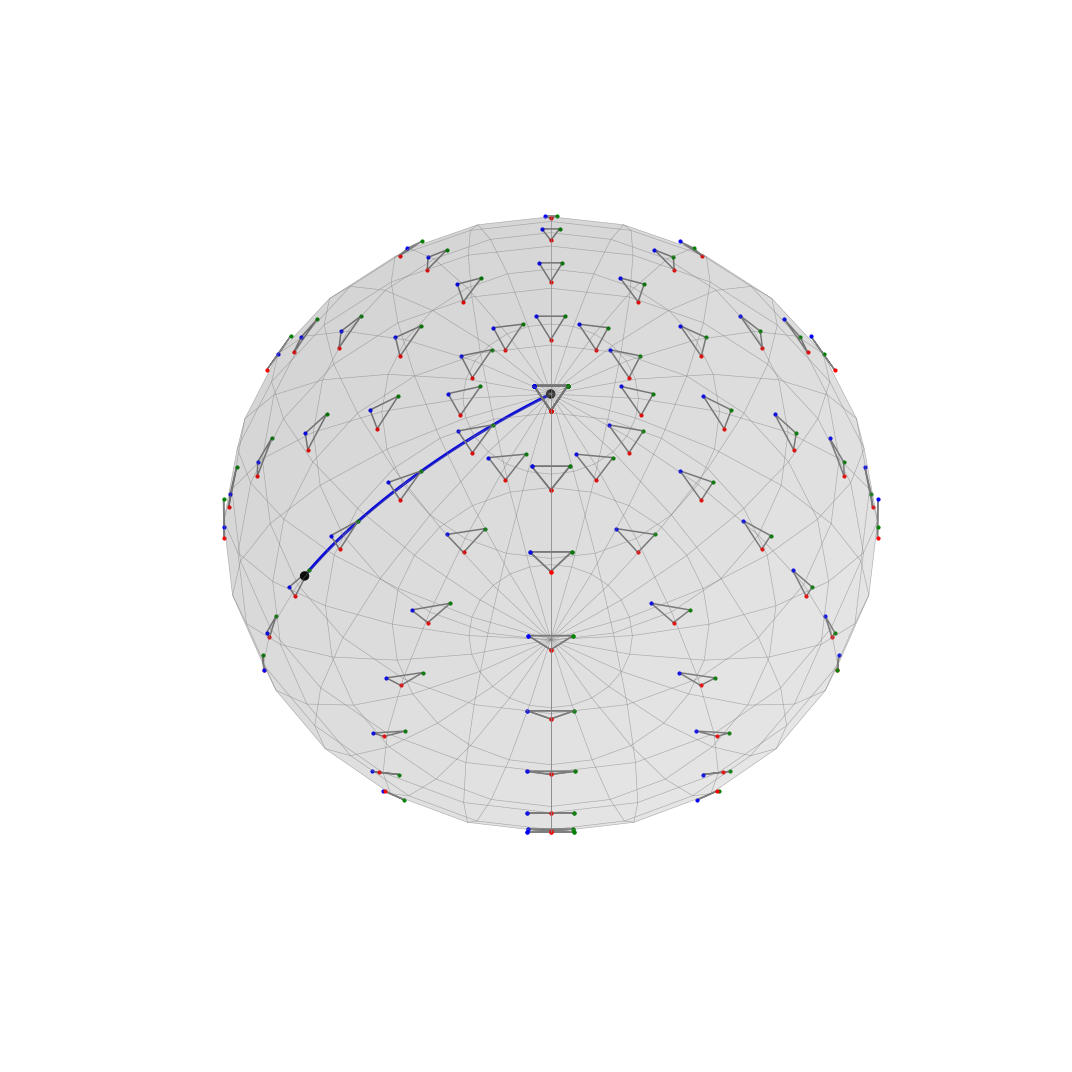

In [18]:
fig = plt.figure(figsize=(15,15))
S.set_ax()
S.set_view(60., 0.)
S.draw()

times = gs.linspace(0,.5,1000)
speeds = gs.array([-t*S.ub for t in times])
points = PreShapeSpace(3, 2).metric.exp(speeds,S.can)

S.clear_points()
S.add_points(points)
S.draw_curve(color='b', lw=3)
S.clear_points()
S.add_points(points[[0,-1]])
S.draw_points(color='k', s=70)

## Parallel transport 

In [19]:
base_point, v, w = S.can, -0.5*S.ub, S.ua
n_rungs=10
ladder = PreShapeSpace(3, 2).metric.ladder_parallel_transport(
    w, v, base_point, n_rungs, return_geodesics=True)

transported = ladder['transported_tangent_vec']
end_point = ladder['end_point']
trajectory = ladder['trajectory']

n_points = 10
t = gs.linspace(0., .5, n_points)
t_main = gs.linspace(0., .5, n_points * 4)
main = []
diag = []
for points in trajectory:
    main_geodesic, diagonal, final_geodesic = points
    main.append(main_geodesic(t_main))
    diag.append(diagonal(-t))
    diag.append(diagonal(t))

diag = gs.stack(diag).reshape(-1, 3, 2)
main = gs.stack(main).reshape(-1, 3, 2)

tangent_vectors = [S.ua/n_rungs,-S.ub/n_rungs, transported/n_rungs]
origin = [base_point, base_point, main[-1]]

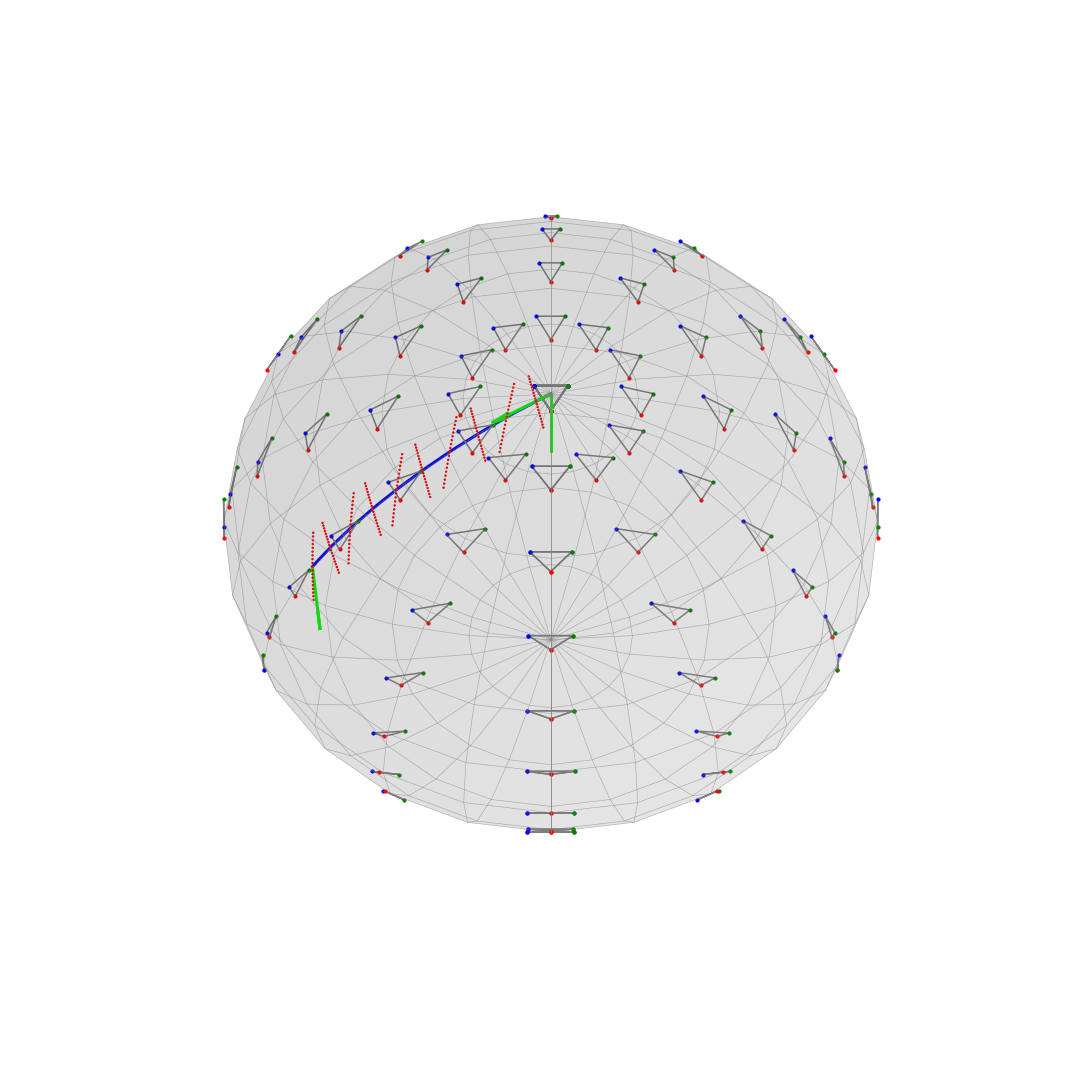

In [20]:
fig = plt.figure(figsize=(15,15))
S.set_ax()
S.set_view(60., 0.)
S.draw()

S.clear_points()
S.add_points(main)
S.draw_curve(color='b', lw=3)
S.clear_points()
S.add_points(diag)
S.draw_points(color='r', s=2)
for bp,v in zip(origin,tangent_vectors):
    S.draw_vector(v, bp, color=(0,1,0), lw=3)